Standardized Features:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Data projected onto the first two principal components:
 [[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


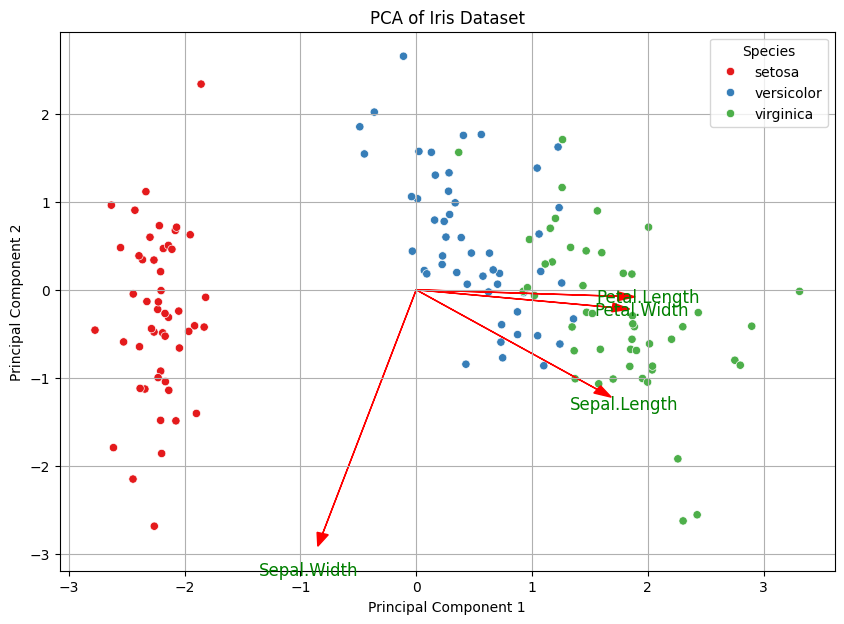

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris_data = pd.read_csv('/content/iris (2).csv')

# Step 1: Standardize the features
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Standardized Features:\n", X_scaled[:5])  # Display the first 5 rows of standardized features

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)
print("\nCovariance Matrix:\n", cov_matrix)

# Step 3: Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Step 5: Project the data onto the first two principal components
X_pca = X_scaled.dot(eigenvectors[:, :2])
print("\nData projected onto the first two principal components:\n", X_pca[:5])  # Display the first 5 rows

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

# Step 6: Visualize the data in the new 2D space
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='Set1')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Step 7: Biplot visualization (showing principal component vectors)
def draw_biplot(pca_data, eigenvectors, feature_labels):
    # Scaling for arrows
    scale = 3

    for i in range(eigenvectors.shape[0]):
        plt.arrow(0, 0, eigenvectors[i, 0]*scale, eigenvectors[i, 1]*scale,
                  color='r', head_width=0.1)
        plt.text(eigenvectors[i, 0]*scale*1.15, eigenvectors[i, 1]*scale*1.15,
                 feature_labels[i], color='g', ha='center', va='center', fontsize=12)

# Feature labels for biplot arrows
features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
draw_biplot(X_pca, eigenvectors[:, :2], features)

plt.show()
